## Nhập thư viện:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Đọc dữ liệu:

In [2]:
df = pd.read_csv('../Datasets/data_cleaned.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually


## Phân tích ...

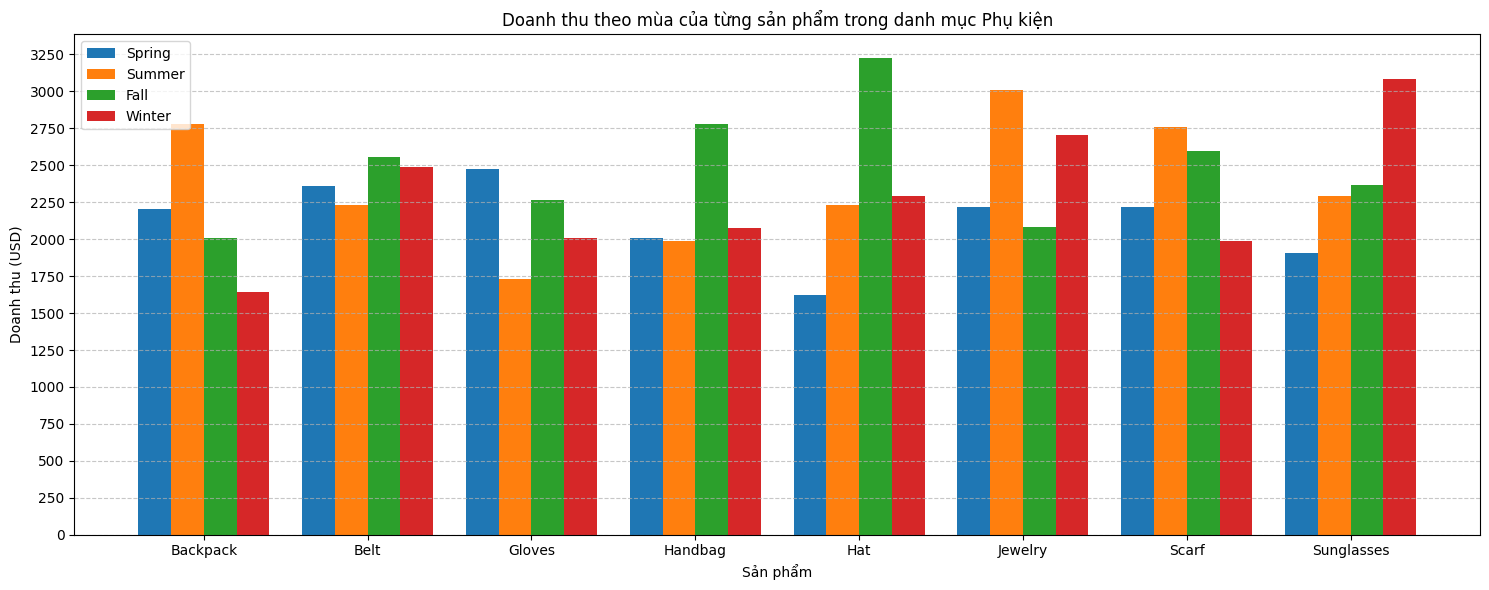

In [55]:
accessories_df = df[df['Category'] == 'Accessories'][['Item Purchased', 'Season', 'Purchase Amount (USD)']]
accessories_products = accessories_df['Item Purchased'].unique()

seasonal_revenue = accessories_df.groupby(['Item Purchased', 'Season'])['Purchase Amount (USD)'].sum().reset_index()
seasonal_revenue['Season'] = pd.Categorical(
    seasonal_revenue['Season'],
    ['Spring', 'Summer', 'Fall', 'Winter'],
    ordered = True
)
seasonal_revenue = seasonal_revenue.sort_values(["Item Purchased", "Season"]).reset_index(drop = 1)
x = np.arange(len(accessories_products))

# Width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots(figsize = (15, 6))

# Plot each set of bars with different offsets
ax.bar(x - 3 * width / 2, seasonal_revenue[seasonal_revenue['Season'] == 'Spring']['Purchase Amount (USD)'], width, label = 'Spring')
ax.bar(x - width / 2, seasonal_revenue[seasonal_revenue['Season'] == 'Summer']['Purchase Amount (USD)'], width, label = 'Summer')
ax.bar(x + width / 2, seasonal_revenue[seasonal_revenue['Season'] == 'Fall']['Purchase Amount (USD)'], width, label = 'Fall')
ax.bar(x + 3 * width / 2, seasonal_revenue[seasonal_revenue['Season'] == 'Winter']['Purchase Amount (USD)'], width, label = 'Winter')

# Customize the x-axis
ax.set_xticks(x)
ax.set_xticklabels(seasonal_revenue['Item Purchased'].sort_values().unique())
ax.set_yticks(np.arange(0, 3500, 250))
ax.set_xlabel('Sản phẩm')
ax.set_ylabel('Doanh thu (USD)')
ax.grid(axis = 'y', linestyle = '--', alpha = 0.7)
ax.set_title('Doanh thu theo mùa của từng sản phẩm trong danh mục Phụ kiện')
ax.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

#### Biểu đồ cột (Bar chart)
- Trục tung (y-axis): Hiển thị tên của từng sản phẩm phụ kiện.
- Trục hoành (x-axis): Hiển thị doanh thu của từng sản phẩm, đơn vị là USD.
- Các cột: Chiều dài của mỗi cột thể hiện giá trị doanh thu tương ứng của từng sản phẩm theo mùa, mỗi mùa được phân biệt bằng 1 màu khác nhau.

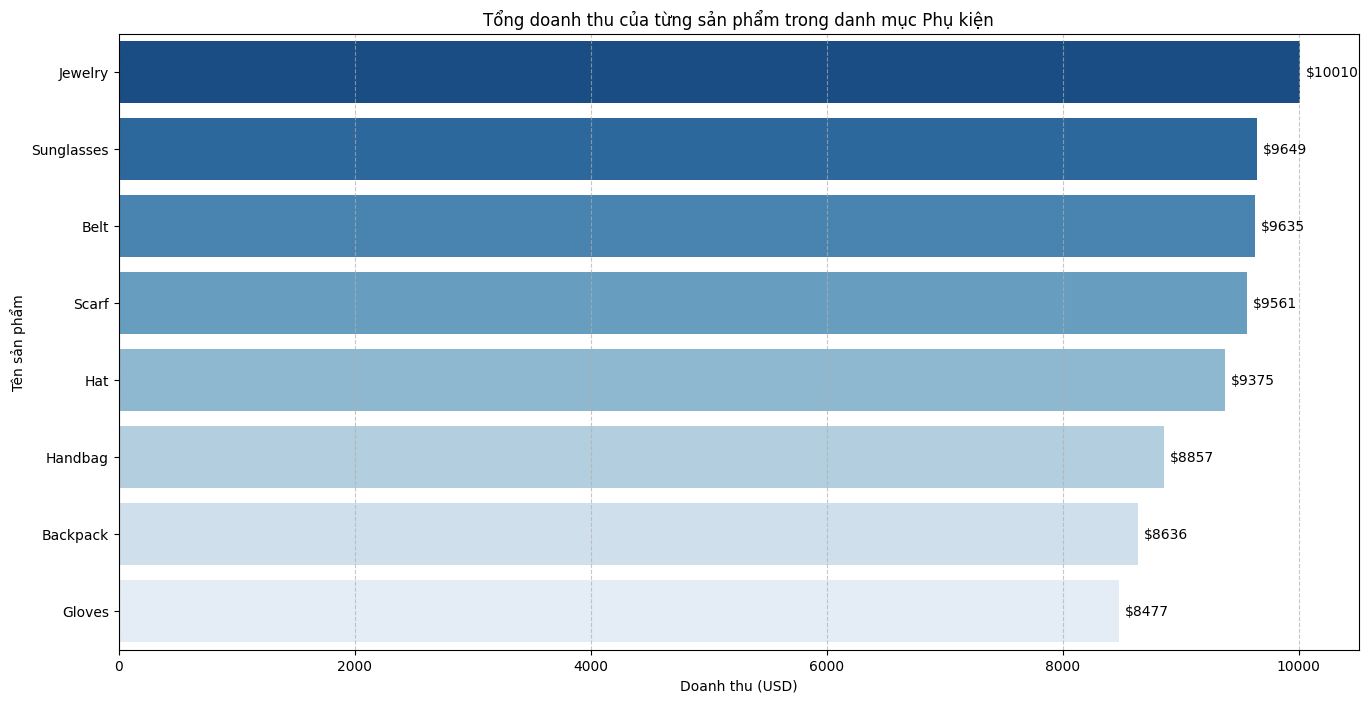

In [ ]:
total_revenue = accessories_df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()
total_revenue = total_revenue.sort_values(by = 'Purchase Amount (USD)', ascending = False)

# Vẽ biểu đồ
plt.figure(figsize = (16, 8))
sns.barplot(data = total_revenue, x = 'Purchase Amount (USD)', y = 'Item Purchased', palette = 'Blues_r')
plt.xlabel('Doanh thu (USD)')
plt.ylabel('Tên sản phẩm')
plt.title('Tổng doanh thu của từng sản phẩm trong danh mục Phụ kiện')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

# Hiển thị giá trị cụ thể trên cột
for index, value in enumerate(total_revenue['Purchase Amount (USD)']):
    plt.text(value + 50, index, f'${int(value)}', va = 'center', fontsize = 10)

plt.show()

#### Biểu đồ cột ngang (Horizontal bar chart)
- Trục tung (y-axis): Hiển thị tên của từng sản phẩm phụ kiện.
- Trục hoành (x-axis): Hiển thị doanh thu của từng sản phẩm, đơn vị là USD.
- Các cột ngang: Chiều dài của mỗi cột thể hiện giá trị doanh thu tương ứng của từng sản phẩm.
- Màu sắc: Màu sắc đậm hơn cho thấy doanh thu cao hơn.

### Nhận xét hai biểu đồ
Hai sản phẩm mang lại doanh thu nhiều nhất theo từng mùa là:  
- __Mùa xuân:__ Găng tay (Gloves), Thắt lưng (Belt)  
- __Mùa hè:__ Trang sức (Jewelry), Ba lô (Backpack)  
- __Mùa thu:__ Nón (Hat), Túi xách (Handbag)  
- __Mùa đông:__ Kính râm (Sunglasses), Trang sức (Jewelry)  

Tuy nhiên, nếu so sánh về tổng doanh thu của cả bốn mùa, hai sản phẩm mang lại doanh thu nhiều nhất là:
- Trang sức (Jewelry)  
- Kính râm (Sunglasses)  

Găng tay tuy có doanh thu lớn nhất vào mùa xuân, nhưng lại là sản phẩm có tổng doanh thu thấp nhất ở đây. Điều này xảy ra có thể do nhu cầu giữ ấm cơ thể để có thể tiếp tục làm việc sau khi kết thúc Giáng sinh ở Mỹ.  
Doanh thu của các sản phẩm trong danh mục này có sự phân hóa nhất định, với chênh lệch doanh thu giữa hai sản phẩm chưa đến $\$1600.$ Điều này cho thấy sự ổn định của doanh thu đối với các mặt hàng phụ kiện.  

### Khảo sát doanh thu theo sự giảm giá của các mặt hàng

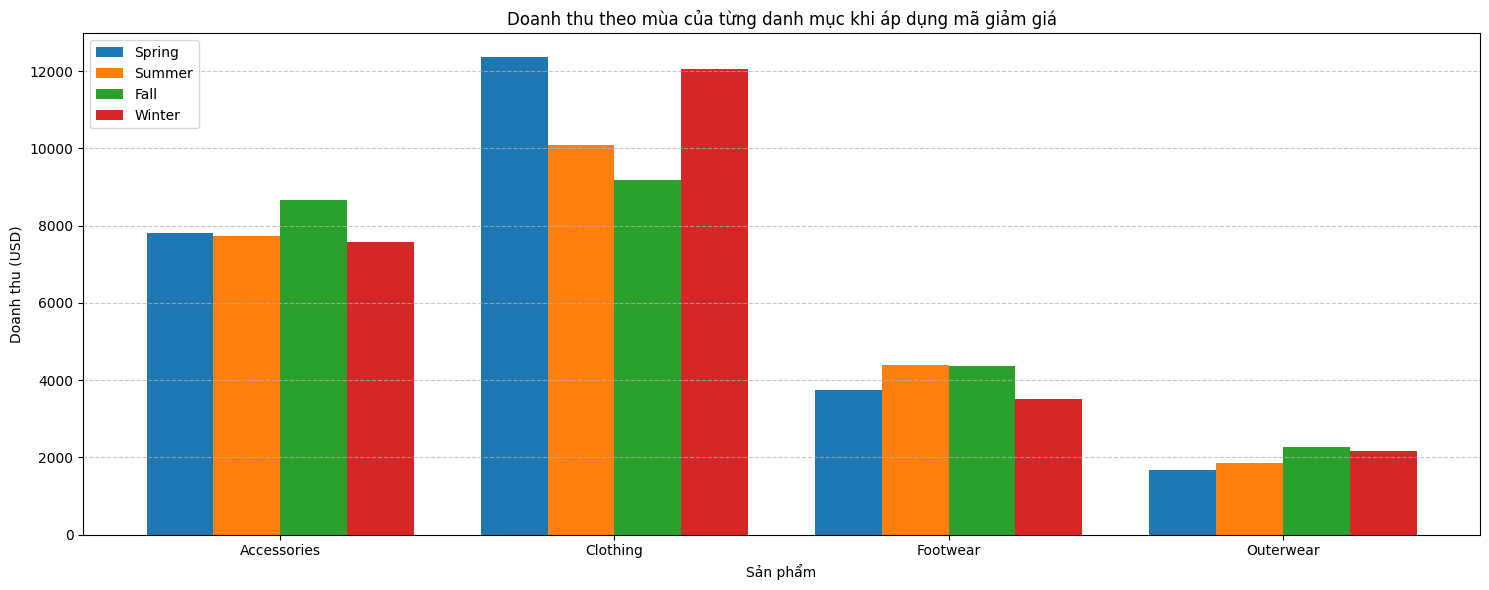

In [85]:
revenue = df.groupby(['Category', 'Discount Applied', 'Season'])['Purchase Amount (USD)'].sum().reset_index()
customer_count = df.groupby(['Category', 'Discount Applied', 'Season'])['Customer ID'].count().reset_index()

revenue['Season'] = pd.Categorical(
    revenue['Season'],
    ['Spring', 'Summer', 'Fall', 'Winter'],
    ordered = True
)
customer_count['Season'] = pd.Categorical(
    customer_count['Season'],
    ['Spring', 'Summer', 'Fall', 'Winter'],
    ordered = True
)
revenue = revenue.sort_values(['Category', 'Season']).reset_index(drop = 1)
customer_count = customer_count.sort_values(['Category', 'Season']).rename(columns = {'Customer ID': 'Customer Count'}).reset_index(drop = 1)

product_categories = df['Category'].sort_values().unique()
x = np.arange(len(product_categories))

# Width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots(figsize = (15, 6))

# Plot each set of bars with different offsets
ax.bar(x - 3 * width / 2, revenue[(revenue['Season'] == 'Spring') & (revenue['Discount Applied'] == 'Yes')]['Purchase Amount (USD)'], width, label = 'Spring')
ax.bar(x - width / 2, revenue[(revenue['Season'] == 'Summer') & (revenue['Discount Applied'] == 'Yes')]['Purchase Amount (USD)'], width, label = 'Summer')
ax.bar(x + width / 2, revenue[(revenue['Season'] == 'Fall') & (revenue['Discount Applied'] == 'Yes')]['Purchase Amount (USD)'], width, label = 'Fall')
ax.bar(x + 3 * width / 2, revenue[(revenue['Season'] == 'Winter') & (revenue['Discount Applied'] == 'Yes')]['Purchase Amount (USD)'], width, label = 'Winter')

# Customize the x-axis
ax.set_xticks(x)
ax.set_xticklabels(product_categories)
ax.set_xlabel('Sản phẩm')
ax.set_ylabel('Doanh thu (USD)')
ax.grid(axis = 'y', linestyle = '--', alpha = 0.7)
ax.set_title('Doanh thu theo mùa của từng danh mục khi áp dụng mã giảm giá')
ax.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

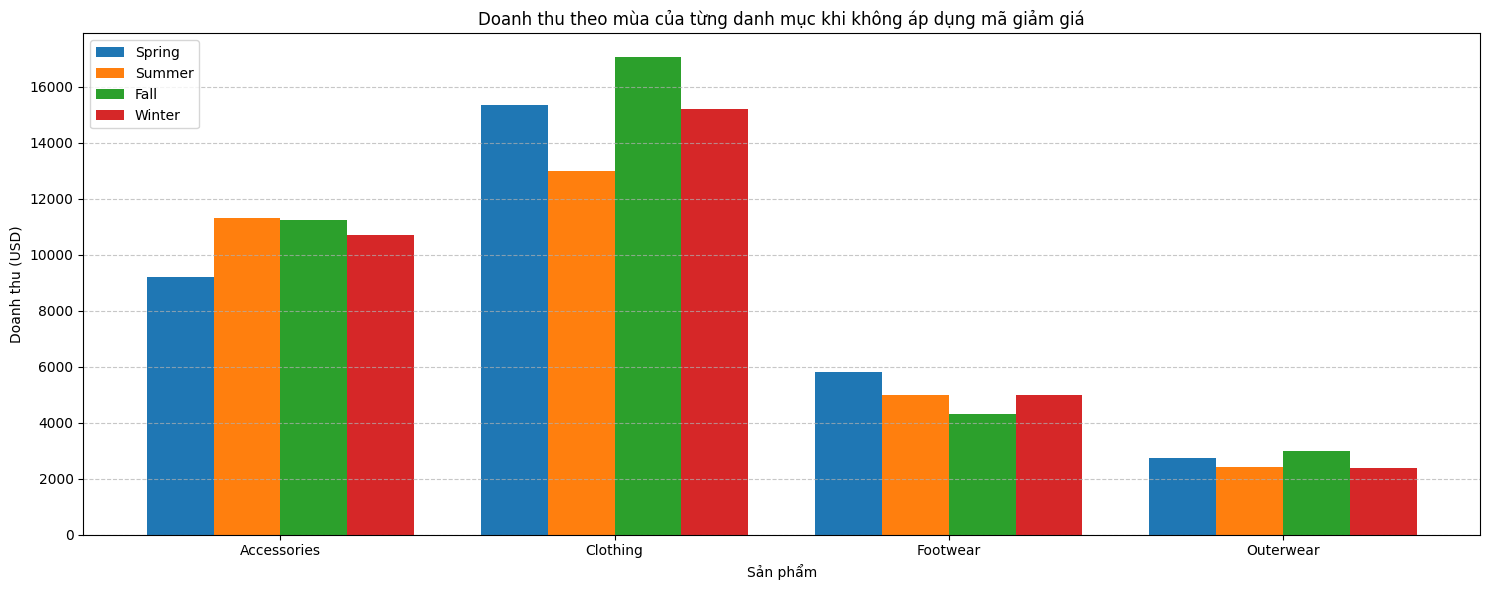

In [69]:
# Create the figure and axes
fig, ax = plt.subplots(figsize = (15, 6))

# Plot each set of bars with different offsets
ax.bar(x - 3 * width / 2, revenue[(revenue['Season'] == 'Spring') & (revenue['Discount Applied'] == 'No')]['Purchase Amount (USD)'], width, label = 'Spring')
ax.bar(x - width / 2, revenue[(revenue['Season'] == 'Summer') & (revenue['Discount Applied'] == 'No')]['Purchase Amount (USD)'], width, label = 'Summer')
ax.bar(x + width / 2, revenue[(revenue['Season'] == 'Fall') & (revenue['Discount Applied'] == 'No')]['Purchase Amount (USD)'], width, label = 'Fall')
ax.bar(x + 3 * width / 2, revenue[(revenue['Season'] == 'Winter') & (revenue['Discount Applied'] == 'No')]['Purchase Amount (USD)'], width, label = 'Winter')

# Customize the x-axis
ax.set_xticks(x)
ax.set_xticklabels(product_categories)
ax.set_xlabel('Sản phẩm')
ax.set_ylabel('Doanh thu (USD)')
ax.grid(axis = 'y', linestyle = '--', alpha = 0.7)
ax.set_title('Doanh thu theo mùa của từng danh mục khi không áp dụng mã giảm giá')
ax.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

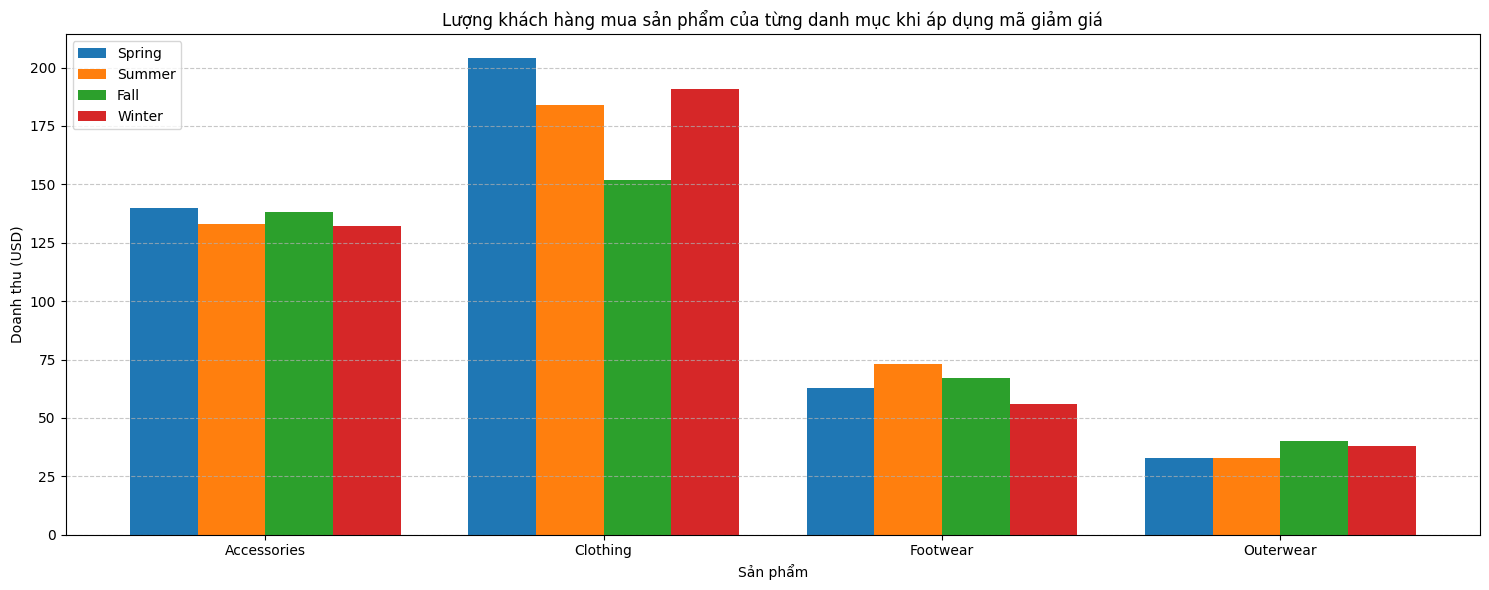

In [87]:
# Create the figure and axes
fig, ax = plt.subplots(figsize = (15, 6))

# Plot each set of bars with different offsets
ax.bar(x - 3 * width / 2, customer_count[(customer_count['Season'] == 'Spring') & (customer_count['Discount Applied'] == 'Yes')]['Customer Count'], width, label = 'Spring')
ax.bar(x - width / 2, customer_count[(customer_count['Season'] == 'Summer') & (customer_count['Discount Applied'] == 'Yes')]['Customer Count'], width, label = 'Summer')
ax.bar(x + width / 2, customer_count[(customer_count['Season'] == 'Fall') & (customer_count['Discount Applied'] == 'Yes')]['Customer Count'], width, label = 'Fall')
ax.bar(x + 3 * width / 2, customer_count[(customer_count['Season'] == 'Winter') & (customer_count['Discount Applied'] == 'Yes')]['Customer Count'], width, label = 'Winter')

# Customize the x-axis
ax.set_xticks(x)
ax.set_xticklabels(product_categories)
ax.set_xlabel('Sản phẩm')
ax.set_ylabel('Doanh thu (USD)')
ax.grid(axis = 'y', linestyle = '--', alpha = 0.7)
ax.set_title('Lượng khách hàng mua sản phẩm của từng danh mục khi áp dụng mã giảm giá')
ax.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

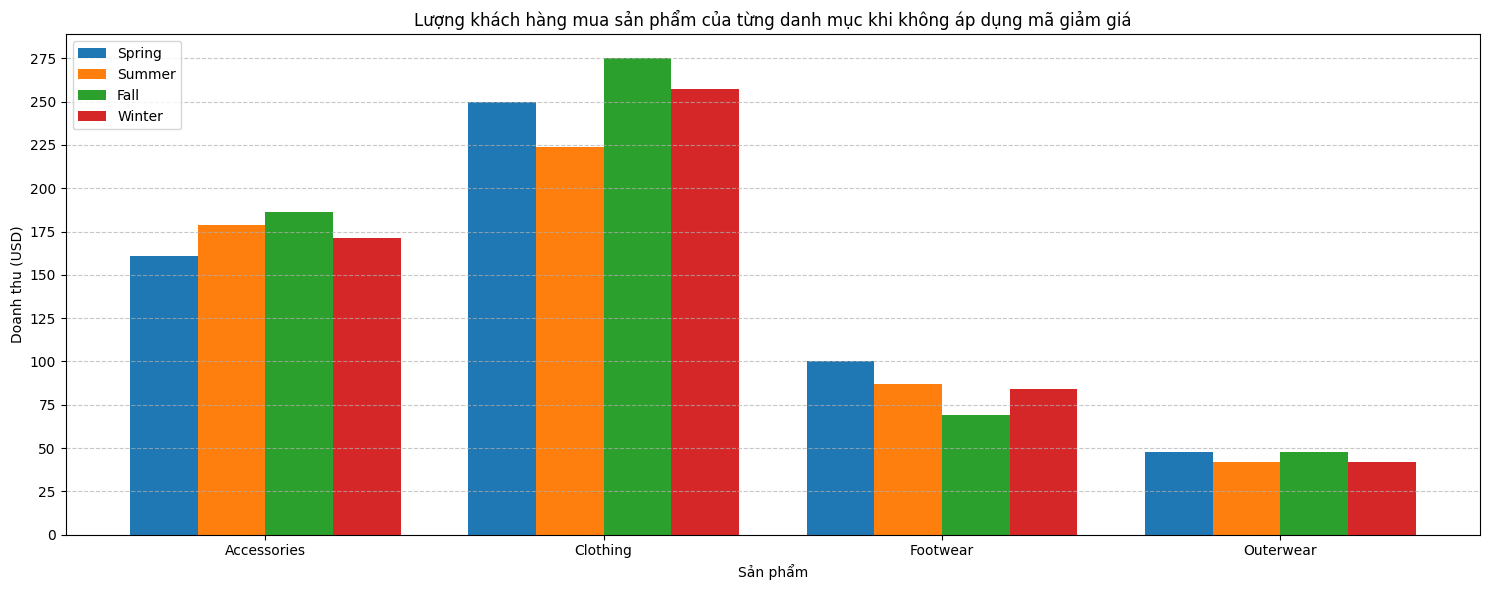

In [89]:
# Create the figure and axes
fig, ax = plt.subplots(figsize = (15, 6))

# Plot each set of bars with different offsets
ax.bar(x - 3 * width / 2, customer_count[(customer_count['Season'] == 'Spring') & (customer_count['Discount Applied'] == 'No')]['Customer Count'], width, label = 'Spring')
ax.bar(x - width / 2, customer_count[(customer_count['Season'] == 'Summer') & (customer_count['Discount Applied'] == 'No')]['Customer Count'], width, label = 'Summer')
ax.bar(x + width / 2, customer_count[(customer_count['Season'] == 'Fall') & (customer_count['Discount Applied'] == 'No')]['Customer Count'], width, label = 'Fall')
ax.bar(x + 3 * width / 2, customer_count[(customer_count['Season'] == 'Winter') & (customer_count['Discount Applied'] == 'No')]['Customer Count'], width, label = 'Winter')

# Customize the x-axis
ax.set_xticks(x)
ax.set_xticklabels(product_categories)
ax.set_yticks(np.arange(0, 300, 25))
ax.set_xlabel('Sản phẩm')
ax.set_ylabel('Doanh thu (USD)')
ax.grid(axis = 'y', linestyle = '--', alpha = 0.7)
ax.set_title('Lượng khách hàng mua sản phẩm của từng danh mục khi không áp dụng mã giảm giá')
ax.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

...